In [1]:
import re  
#import nltk
import string
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
train  = pd.read_csv('train_E6oV3lV.csv') 
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [3]:
test = pd.read_csv('test_tweets_anuFYb8.csv')
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


### DATA INSPECTION

In [4]:
train.label.value_counts()                  

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 
29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

In [5]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [5]:
train[train.label==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [6]:
train[train.label==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [7]:
train.shape

(31962, 3)

In [8]:
test.shape

(17197, 2)

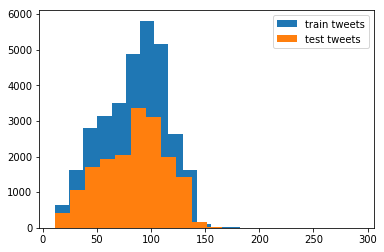

In [9]:
train_len=train["tweet"].str.len()
test_len=test["tweet"].str.len()
plt.hist(train_len,bins=20,label="train tweets")
plt.hist(test_len,bins=20,label="test tweets")
plt.legend()
plt.show()

In [4]:
# Class count
count_class_0 ,count_class_1 = train.label.value_counts()

# Divide by class
class_0 = train[train.label == 0]
class_1 =train[train.label == 1]
class_0_under = class_0.sample(count_class_1)
train_under = pd.concat([class_0_under, class_1], axis=0)

print('Random under-sampling:')
#print(df_test_under.sentiment.value_counts())
print(train_under.label.value_counts())
print(train_under.shape)

Random under-sampling:
1    2242
0    2242
Name: label, dtype: int64
(4484, 3)


In [5]:
class_1_over = class_1.sample(count_class_0, replace=True)
train_over = pd.concat([class_0, class_1_over ], axis=0)

print('Random under-sampling:')
#print(df_test_under.sentiment.value_counts())
print(train_over.label.value_counts())
print(train_over.shape)

Random under-sampling:
1    29720
0    29720
Name: label, dtype: int64
(59440, 3)


In [6]:
train=train_over.reset_index()

### DATA CLEANING

In [7]:
combi=train.append(test,ignore_index=True)
combi.shape

C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(76637, 4)

In [8]:
#remove unwanted text patterns from the tweets.
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,' ',input_txt)
    return input_txt

In [9]:
#1-Removing Twitter Handles (@user)
combi["tidy_tweet"]=np.vectorize(remove_pattern)(combi['tweet'],'@[\w]*')  
combi.head()

,id,index,label,tweet,tidy_tweet
0,1,0.0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,1.0,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,2.0,0.0,bihday your majesty,bihday your majesty
3,4,3.0,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,4.0,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
#2-Removing Punctuations, Numbers, and Special Characters-
#“[^a-zA-Z#]” means anything except alphabets and ‘#’.
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head()

,id,index,label,tweet,tidy_tweet
0,1,0.0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,1.0,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,2.0,0.0,bihday your majesty,bihday your majesty
3,4,3.0,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,4.0,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [11]:
#3-Removing Short Words-words having length 3 or less like “hmm”, “oh”
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,index,label,tweet,tidy_tweet
0,1,0.0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,1.0,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,2.0,0.0,bihday your majesty,bihday your majesty
3,4,3.0,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,4.0,0.0,factsguide: society now #motivation,factsguide society #motivation


In [12]:
#4-Text Normalization-use nltk’s PorterStemmer() function to normalize the 
#tweets. But before that we will have to tokenize the tweets. 
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [13]:
#Now we can normalize the tokenized tweets.
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])   #stemming

In [14]:
#Now let’s stitch these tokens back together. It can easily be done using 
#nltk’s MosesDetokenizer function.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [15]:
combi.head(10)

,id,index,label,tweet,tidy_tweet
0,1,0.0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,1.0,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,2.0,0.0,bihday your majesty,bihday your majesti
3,4,3.0,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,4.0,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,5.0,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talk befor they leav chao disput when they there #allshowandnogo
6,7,6.0,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camp tomorrow danni
7,8,7.0,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl
8,9,8.0,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cav #champion #cleveland #clevelandcavali
9,10,9.0,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcom here


### STORY GENERATION AND VISUALIZATION

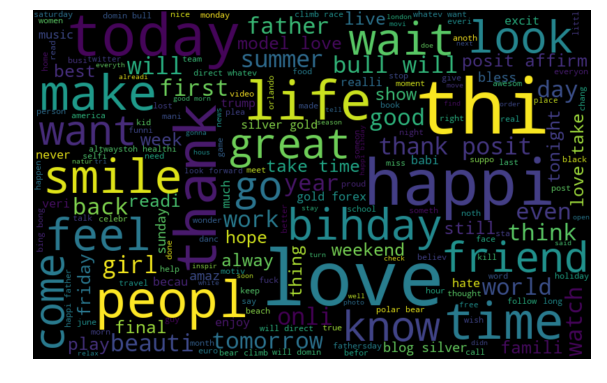

In [84]:
#A) Understanding the common words used in the tweets: WordCloud
from wordcloud import WordCloud
all_words = ' '.join([text for text in combi['tidy_tweet']])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the
most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist 
tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

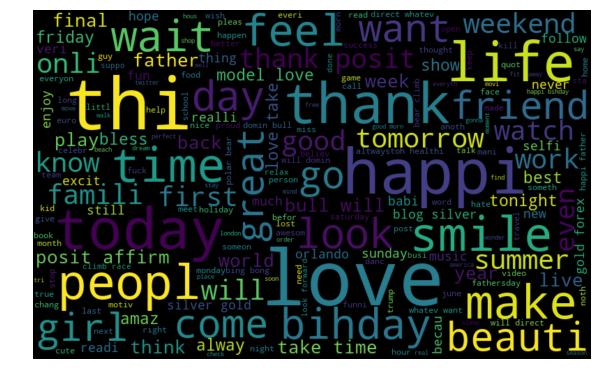

In [20]:
#B) Words in non racist/sexist tweets
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets.
Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

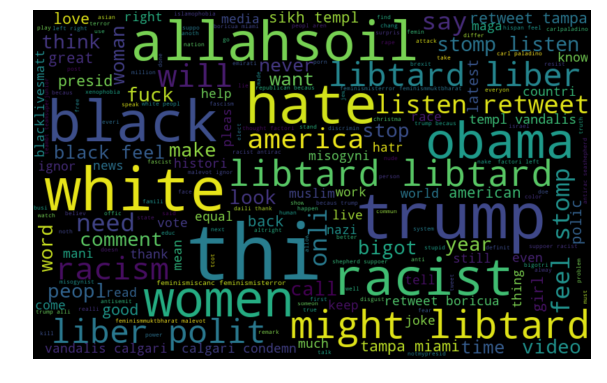

In [85]:
#C) Racist/Sexist Tweets
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, 
it seems we have a pretty good text data to work on

In [22]:
#D) Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. 
We should try to check whether these hashtags add any value to our sentiment analysis task, i.e.,
they help in distinguishing tweets into the different sentiments.
We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the
other for racist/sexist tweets.

In [16]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

In [17]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label']==0])
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 

In [18]:
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot 
the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

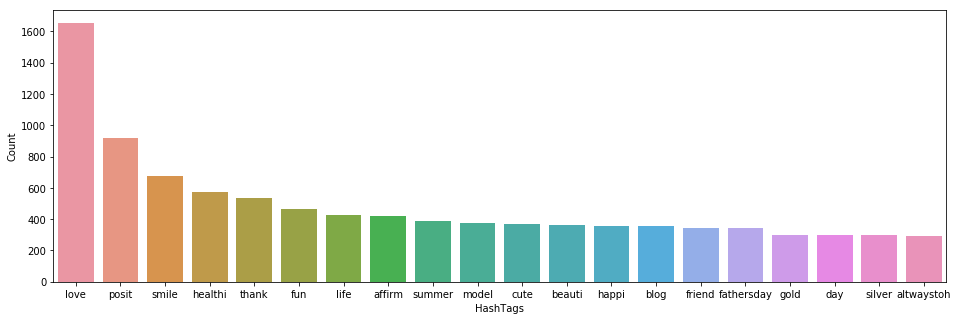

In [26]:
#Non-Racist/Sexist Tweets
a=nltk.FreqDist(HT_regular)
d=pd.DataFrame({'HashTags': list(a.keys()), 'Count' : list(a.values())})
# selecting top 20 most frequent hashtags 
d=d.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d , x='HashTags' ,y='Count')
ax.set(ylabel='Count')
plt.show()

All these hashtags are positive and it makes sense.

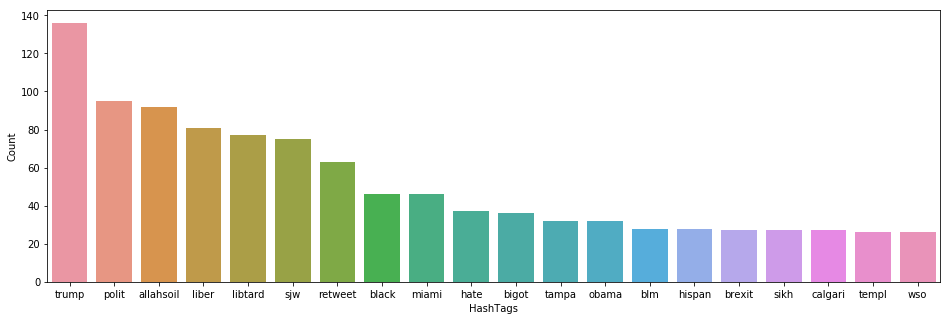

In [27]:
#Racist/Sexist Tweets
b=nltk.FreqDist(HT_negative)
e=pd.DataFrame({'HashTags': list(b.keys()),'Count': list(b.values())})
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x="HashTags",y="Count")
ax.set(ylabel='Count')
plt.show()

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a 
bad idea to keep these hashtags in our data as they contain useful information. Next, we will
try to extract features from the tokenized tweets.

### Bag-of-Words Features

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage,
text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(76637, 1000)

### TF-IDF Features

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(76637, 1000)

### Word2Vec Features

#### 1. Word2Vec Embeddings

In [21]:
import gensim
tokenized_tweet=[]
for i in range(len(combi)):
    tokenized_tweet.append([w for w in combi['tidy_tweet'][i].split()])
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 4, # no.of cores
            seed = 34) 
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

C:\Users\Public\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


(10878122, 12011960)

In [22]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [23]:
#Preparing word2vec feature set…
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape    
#Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

(76637, 200)

#### 2. Doc2Vec Embedding

In [40]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [51]:
#To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. 
#We can do so by using Gensim’s LabeledSentence() function.
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [48]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [53]:
#Now let’s train a doc2vec model.
model_d2v = gensim.models.Doc2Vec(
    dm=1, # dm = 1 for ‘distributed memory’ model                                  
    dm_mean=1, # dm = 1 for using mean of the context word vectors                                 
    vector_size=200, # no. of desired features                                  
    window=5, # width of the context window                                  
    negative=7, # if > 0 then negative sampling will be used                                 
    min_count=5, # Ignores all words with total frequency lower than 2.                                  
    workers=3, # no. of cores                                  
    alpha=0.1, # learning rate                                  
    seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

100%|███████████████████████████████| 49159/49159 [00:00<00:00, 1045762.64it/s]


In [54]:
#Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

### Modeling

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

#Bag-of-Words Features
# Extracting train and test BoW features 
train_bow = bow[:train.shape[0],:] 
test_bow = bow[train.shape[0]:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=2,test_size=0.3) 
lreg = LogisticRegression() 
# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)) # calculating f1 score for the validation set 0.531
#Now let’s make predictions for the test dataset and create a submission file.
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file
#Public Leaderboard F1 Score: 0.567

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8898632963631674


In [25]:
#TF-IDF Features
#We’ll follow the same steps as above, but now for the TF-IDF feature set.

train_tfidf = tfidf[:train.shape[0],:] 
test_tfidf = tfidf[train.shape[0]:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set 0.544
#Public Leaderboard F1 Score: 0.564

0.8809912298592698

In [26]:
#Word2Vec Features
train_w2v = wordvec_df.iloc[:train.shape[0],:] 
test_w2v = wordvec_df.iloc[train.shape[0]:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) #0.622
#Public Leaderboard F1 Score: 0.661

0.9128945960406636

In [94]:
lreg.fit(train_w2v, train['label'])
test_pred = lreg.predict_proba(test_w2v) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow_over.csv', index=False) 

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
#Doc2Vec Features
train_d2v = docvec_df.iloc[:train.shape[0],:] 
test_d2v = docvec_df.iloc[train.shape[0]:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)  #0.367
#Public Leaderboard F1 Score: 0.381

#Doc2Vec features do not seem to be capturing the right signals as both the F1-scores, on validation set 
#and on public leaderboard are quite low

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.33862433862433866

#### Support Vector Machine (SVM)

In [64]:
from sklearn import svm

#Bag-of-Words Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)  )   #0.508

test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
#submission.to_csv('sub_svm_bow.csv', index=False)
#Public Leaderboard F1 Score: 0.554

#Here both validation score and leaderboard score are slightly lesser than the Logistic Regression scores 
#for bag-of-words features

0.56289592760181


In [65]:
#TF-IDF Features
svc = svm.SVC(kernel='linear', 
C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)    #0.51
#Public Leaderboard F1 Score: 0.546

0.5451230628988148

In [66]:
#Word2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)  #0.614
#Public Leaderboard F1 Score: 0.654

0.6147736298649721

In [67]:
#Doc2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)  #0.203
#Public Leaderboard F1 Score: 0.214

0.22099447513812154

#### RandomForest

In [68]:
from sklearn.ensemble import RandomForestClassifier

#Bag-of-Words Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
print(f1_score(yvalid, prediction) ) # validation score 0.553

test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
#submission.to_csv('sub_rf_bow.csv', index=False)
#Public Leaderboard F1 Score: 0.598

0.581986143187067


In [69]:
#TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)  #0.562
#Public Leaderboard F1 Score: 0.589

0.5961361545538179

In [70]:
rf1 = RandomForestClassifier(n_estimators=400, random_state=11).fit(train_tfidf train['label']) 
test_pred = rf1.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_rf_tfidf.csv', index=False)

In [71]:
#Word2Vec Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)   # 0.507
#Public Leaderboard F1 Score: 0.549

0.49187432286023836

In [72]:
#Doc2Vec Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v) 
f1_score(yvalid, prediction)  # 0.056
#Public Leaderboard F1 Score: 0.07

0.06267806267806268

#### XGBoost

In [71]:
from xgboost import XGBClassifier

#Bag-of-Words Features
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
print(f1_score(yvalid, prediction)) # 0.513

test_pred = xgb_model.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_bow.csv', index=False)
#Public Leaderboard F1 Score: 0.554


0.8118022328548644


In [72]:
#TF-IDF Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)
#Public Leaderboard F1 Score: 0.554

0.8085443037974683

In [95]:
#Word2Vec Features
from xgboost import XGBClassifier
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
print(f1_score(yvalid, prediction))      #0.652
#Public Leaderboard F1 Score: 0.698

0.9939271255060729


In [96]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(train_w2v, train['label'])
test_pred = xgb.predict(test_w2v) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_w2v.csv', index=False)
#XGBoost model on word2vec features has outperformed all the previuos models in this course.

In [88]:
#Doc2Vec Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v) 
f1_score(yvalid, prediction)   # 0.345
#Public Leaderboard F1 Score: 0.374

0.37020316027088035

In [48]:
# {'objective': 'binary:logistic',
#  'max_depth': 9,
#  'min_child_weight': 7,
#  'eta': 0.3,
#  'subsample': 0.9,
#  'colsample_bytree': 0.5,
#  'colsample': 0.9,
#  'gamma': 0.4}
from xgboost import XGBClassifier
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10000, n_jobs=1, nthread=3,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

#### FineTuning XGBoost + Word2Vec

XGBoost with Word2Vec model has given us the best performance so far. Let’s try to tune it further to extract as much from it as we can. XGBoost has quite a many tuning parameters and sometimes it becomes tricky to properly tune them.

In [27]:
import xgboost as xgb
#Here we will use DMatrices. A DMatrix can contain both the features and the target.

dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

C:\Users\Public\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [32]:
#We will prepare a custom evaluation metric to calculate F1 score.

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

####  Parameter Tuning

Tuning max_depth and min_child_weight

In [34]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth, min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     
# Finding best F1 Score
    
mean_f1 = cv_results['test-f1_score-mean'].max()
    
boost_rounds = cv_results['test-f1_score-mean'].argmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
	F1 Score 0.987643 for 159 rounds
Best params: 9, 7, F1 Score: 0.987643


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Updating max_depth and min_child_weight parameters.

In [35]:
params['max_depth'] = 9 
params['min_child_weight'] = 7

Tuning subsample and colsample

In [36]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.9863580000000001 for 136 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.9863580000000001 for 136 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.9863580000000001 for 136 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.9863580000000001 for 136 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.9863580000000001 for 136 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.9861525999999999 for 111 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.9861525999999999 for 111 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.9861525999999999 for 111 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.9861525999999999 for 111 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.9861525999999999 for 111 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.9867302 for 109 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.9867302 for 109 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.9867302 for 109 rounds
CV with sub

Updating subsample and colsample_bytree

In [37]:
params['subsample'] = .9 
params['colsample_bytree'] = .5

Now let’s tune the learning rate.

In [38]:
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.988205 for 238 rounds
CV with eta=0.2
	F1 Score 0.9866958 for 124 rounds
CV with eta=0.1
	F1 Score 0.9875362000000001 for 356 rounds
CV with eta=0.05
	F1 Score 0.9876685999999999 for 581 rounds
CV with eta=0.01
	F1 Score 0.6680474000000001 for 0 rounds
CV with eta=0.005
	F1 Score 0.6680474000000001 for 0 rounds
Best params: 0.3, F1 Score: 0.988205


In [41]:
params['eta'] = .3

Now lets tune gamma value using the parameters already tuned above. We’ll check for 5 values here.

In [42]:
max_f1 = 0.
best_params = None
for gamma in range(0,15):
    print("CV with gamma={}".format(gamma/10.))

    # Update ETA
    params['gamma'] = gamma/10.

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = gamma/10.

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with gamma=0.0


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.9871766 for 125 rounds
CV with gamma=0.1
	F1 Score 0.9865728 for 92 rounds
CV with gamma=0.2
	F1 Score 0.9867587999999999 for 89 rounds
CV with gamma=0.3
	F1 Score 0.9875294 for 145 rounds
CV with gamma=0.4
	F1 Score 0.9879764000000002 for 147 rounds
CV with gamma=0.5
	F1 Score 0.9867589999999999 for 102 rounds
CV with gamma=0.6
	F1 Score 0.9870645999999998 for 130 rounds
CV with gamma=0.7
	F1 Score 0.986603 for 120 rounds
CV with gamma=0.8
	F1 Score 0.9866462 for 113 rounds
CV with gamma=0.9
	F1 Score 0.9858204 for 96 rounds
CV with gamma=1.0
	F1 Score 0.9861443999999999 for 115 rounds
CV with gamma=1.1
	F1 Score 0.9855024 for 70 rounds
CV with gamma=1.2
	F1 Score 0.9856462 for 105 rounds
CV with gamma=1.3
	F1 Score 0.9851241999999999 for 90 rounds
CV with gamma=1.4
	F1 Score 0.9848725999999999 for 89 rounds
Best params: 0.4, F1 Score: 0.9879764000000002


In [43]:
params['gamma'] = 0.4

Let’s have a look at the final list of tuned parameters.

In [44]:
params

{'objective': 'binary:logistic',
 'max_depth': 9,
 'min_child_weight': 7,
 'eta': 0.3,
 'subsample': 0.9,
 'colsample_bytree': 0.5,
 'colsample': 0.9,
 'gamma': 0.4}

Finally we can now use these tuned parameters in our xgboost model. We have used early stopping of 10 which means if the model’s performance doesn’t improve under 10 rounds, then the model training will be stopped.

In [53]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 10000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=600
)


[0]	Validation-error:0.104924	Validation-f1_score:0.663369
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 600 rounds.
[1]	Validation-error:0.072847	Validation-f1_score:0.840073
[2]	Validation-error:0.050976	Validation-f1_score:0.873972
[3]	Validation-error:0.04105	Validation-f1_score:0.908538
[4]	Validation-error:0.034096	Validation-f1_score:0.926481
[5]	Validation-error:0.028432	Validation-f1_score:0.938001
[6]	Validation-error:0.025852	Validation-f1_score:0.945908
[7]	Validation-error:0.023105	Validation-f1_score:0.952905
[8]	Validation-error:0.021254	Validation-f1_score:0.958125
[9]	Validation-error:0.020132	Validation-f1_score:0.962144
[10]	Validation-error:0.018114	Validation-f1_score:0.963824
[11]	Validation-error:0.017104	Validation-f1_score:0.96711
[12]	Validation-error:0.015646	Validation-f1_score:0.969165
[13]	Validation-error:0.015141	Validation-f1_score:0.970976
[14]	Val

[135]	Validation-error:0.007515	Validation-f1_score:0.988926
[136]	Validation-error:0.007459	Validation-f1_score:0.988926
[137]	Validation-error:0.007402	Validation-f1_score:0.988981
[138]	Validation-error:0.007402	Validation-f1_score:0.988981
[139]	Validation-error:0.007402	Validation-f1_score:0.988981
[140]	Validation-error:0.00729	Validation-f1_score:0.989092
[141]	Validation-error:0.007346	Validation-f1_score:0.989147
[142]	Validation-error:0.007234	Validation-f1_score:0.989037
[143]	Validation-error:0.007346	Validation-f1_score:0.989092
[144]	Validation-error:0.007346	Validation-f1_score:0.989147
[145]	Validation-error:0.00729	Validation-f1_score:0.989258
[146]	Validation-error:0.007346	Validation-f1_score:0.989258
[147]	Validation-error:0.007122	Validation-f1_score:0.989203
[148]	Validation-error:0.007234	Validation-f1_score:0.989313
[149]	Validation-error:0.007178	Validation-f1_score:0.989147
[150]	Validation-error:0.007178	Validation-f1_score:0.989203
[151]	Validation-error:0.0

[270]	Validation-error:0.007122	Validation-f1_score:0.989646
[271]	Validation-error:0.007122	Validation-f1_score:0.989757
[272]	Validation-error:0.007122	Validation-f1_score:0.989701
[273]	Validation-error:0.007122	Validation-f1_score:0.989812
[274]	Validation-error:0.007066	Validation-f1_score:0.989923
[275]	Validation-error:0.007122	Validation-f1_score:0.989867
[276]	Validation-error:0.007066	Validation-f1_score:0.989757
[277]	Validation-error:0.007066	Validation-f1_score:0.989757
[278]	Validation-error:0.007066	Validation-f1_score:0.989757
[279]	Validation-error:0.00701	Validation-f1_score:0.989867
[280]	Validation-error:0.00701	Validation-f1_score:0.989867
[281]	Validation-error:0.00701	Validation-f1_score:0.989867
[282]	Validation-error:0.006954	Validation-f1_score:0.989812
[283]	Validation-error:0.00701	Validation-f1_score:0.989812
[284]	Validation-error:0.007066	Validation-f1_score:0.989812
[285]	Validation-error:0.007066	Validation-f1_score:0.989812
[286]	Validation-error:0.007

[406]	Validation-error:0.007234	Validation-f1_score:0.98948
[407]	Validation-error:0.007178	Validation-f1_score:0.98948
[408]	Validation-error:0.007122	Validation-f1_score:0.989535
[409]	Validation-error:0.007122	Validation-f1_score:0.989535
[410]	Validation-error:0.007234	Validation-f1_score:0.989535
[411]	Validation-error:0.007122	Validation-f1_score:0.98959
[412]	Validation-error:0.007122	Validation-f1_score:0.98959
[413]	Validation-error:0.007178	Validation-f1_score:0.98959
[414]	Validation-error:0.007178	Validation-f1_score:0.989646
[415]	Validation-error:0.007234	Validation-f1_score:0.98959
[416]	Validation-error:0.007234	Validation-f1_score:0.98959
[417]	Validation-error:0.007234	Validation-f1_score:0.98959
[418]	Validation-error:0.007234	Validation-f1_score:0.98959
[419]	Validation-error:0.00729	Validation-f1_score:0.989535
[420]	Validation-error:0.007234	Validation-f1_score:0.98959
[421]	Validation-error:0.00729	Validation-f1_score:0.989701
[422]	Validation-error:0.00729	Valid

[542]	Validation-error:0.007234	Validation-f1_score:0.989701
[543]	Validation-error:0.007234	Validation-f1_score:0.989646
[544]	Validation-error:0.007066	Validation-f1_score:0.989701
[545]	Validation-error:0.006954	Validation-f1_score:0.989757
[546]	Validation-error:0.007122	Validation-f1_score:0.989812
[547]	Validation-error:0.007234	Validation-f1_score:0.989646
[548]	Validation-error:0.007122	Validation-f1_score:0.989646
[549]	Validation-error:0.007066	Validation-f1_score:0.989646
[550]	Validation-error:0.007234	Validation-f1_score:0.98959
[551]	Validation-error:0.007234	Validation-f1_score:0.989646
[552]	Validation-error:0.007234	Validation-f1_score:0.989646
[553]	Validation-error:0.007122	Validation-f1_score:0.98959
[554]	Validation-error:0.007122	Validation-f1_score:0.98959
[555]	Validation-error:0.007122	Validation-f1_score:0.98959
[556]	Validation-error:0.007122	Validation-f1_score:0.98959
[557]	Validation-error:0.007122	Validation-f1_score:0.98959
[558]	Validation-error:0.00712

[678]	Validation-error:0.00701	Validation-f1_score:0.990144
[679]	Validation-error:0.00701	Validation-f1_score:0.990089
[680]	Validation-error:0.00701	Validation-f1_score:0.990089
[681]	Validation-error:0.00701	Validation-f1_score:0.990034
[682]	Validation-error:0.00701	Validation-f1_score:0.990034
[683]	Validation-error:0.00701	Validation-f1_score:0.990034
[684]	Validation-error:0.00701	Validation-f1_score:0.990034
[685]	Validation-error:0.007066	Validation-f1_score:0.990089
[686]	Validation-error:0.007066	Validation-f1_score:0.990089
[687]	Validation-error:0.007066	Validation-f1_score:0.990034
[688]	Validation-error:0.007066	Validation-f1_score:0.990034
[689]	Validation-error:0.007066	Validation-f1_score:0.990034
[690]	Validation-error:0.007066	Validation-f1_score:0.990089
[691]	Validation-error:0.007066	Validation-f1_score:0.990034
[692]	Validation-error:0.007066	Validation-f1_score:0.990089
[693]	Validation-error:0.007066	Validation-f1_score:0.990089
[694]	Validation-error:0.007178

[814]	Validation-error:0.006842	Validation-f1_score:0.990034
[815]	Validation-error:0.006786	Validation-f1_score:0.990034
[816]	Validation-error:0.006786	Validation-f1_score:0.989978
[817]	Validation-error:0.006786	Validation-f1_score:0.990034
[818]	Validation-error:0.006786	Validation-f1_score:0.990144
[819]	Validation-error:0.006786	Validation-f1_score:0.990034
[820]	Validation-error:0.006786	Validation-f1_score:0.990144
[821]	Validation-error:0.006786	Validation-f1_score:0.990089
[822]	Validation-error:0.006786	Validation-f1_score:0.989978
[823]	Validation-error:0.006786	Validation-f1_score:0.9902
[824]	Validation-error:0.006898	Validation-f1_score:0.990255
[825]	Validation-error:0.006898	Validation-f1_score:0.990255
[826]	Validation-error:0.006898	Validation-f1_score:0.990255
[827]	Validation-error:0.006898	Validation-f1_score:0.990255
[828]	Validation-error:0.006898	Validation-f1_score:0.990255
[829]	Validation-error:0.006898	Validation-f1_score:0.9902
[830]	Validation-error:0.006

[949]	Validation-error:0.006954	Validation-f1_score:0.989978
[950]	Validation-error:0.006954	Validation-f1_score:0.990089
[951]	Validation-error:0.006954	Validation-f1_score:0.990144
[952]	Validation-error:0.006954	Validation-f1_score:0.990144
[953]	Validation-error:0.006954	Validation-f1_score:0.990144
[954]	Validation-error:0.006954	Validation-f1_score:0.990089
[955]	Validation-error:0.006954	Validation-f1_score:0.990089
[956]	Validation-error:0.006954	Validation-f1_score:0.989867
[957]	Validation-error:0.006954	Validation-f1_score:0.989867
[958]	Validation-error:0.006954	Validation-f1_score:0.989978
[959]	Validation-error:0.006954	Validation-f1_score:0.989923
[960]	Validation-error:0.006954	Validation-f1_score:0.989923
[961]	Validation-error:0.006842	Validation-f1_score:0.990034
[962]	Validation-error:0.006842	Validation-f1_score:0.989978
[963]	Validation-error:0.006898	Validation-f1_score:0.989978
[964]	Validation-error:0.006898	Validation-f1_score:0.989978
[965]	Validation-error:0

[1082]	Validation-error:0.006842	Validation-f1_score:0.990144
[1083]	Validation-error:0.006842	Validation-f1_score:0.990144
[1084]	Validation-error:0.006842	Validation-f1_score:0.990144
[1085]	Validation-error:0.006898	Validation-f1_score:0.990034
[1086]	Validation-error:0.006898	Validation-f1_score:0.990034
[1087]	Validation-error:0.006954	Validation-f1_score:0.990089
[1088]	Validation-error:0.006898	Validation-f1_score:0.990089
[1089]	Validation-error:0.006898	Validation-f1_score:0.990144
[1090]	Validation-error:0.006898	Validation-f1_score:0.990089
[1091]	Validation-error:0.006898	Validation-f1_score:0.990144
[1092]	Validation-error:0.006898	Validation-f1_score:0.990144
[1093]	Validation-error:0.006898	Validation-f1_score:0.990144
[1094]	Validation-error:0.006842	Validation-f1_score:0.9902
[1095]	Validation-error:0.006898	Validation-f1_score:0.990144
[1096]	Validation-error:0.006898	Validation-f1_score:0.990144
[1097]	Validation-error:0.006786	Validation-f1_score:0.990034
[1098]	Val

[1215]	Validation-error:0.006673	Validation-f1_score:0.990089
[1216]	Validation-error:0.006673	Validation-f1_score:0.990089
[1217]	Validation-error:0.006673	Validation-f1_score:0.990089
[1218]	Validation-error:0.006673	Validation-f1_score:0.990089
[1219]	Validation-error:0.006673	Validation-f1_score:0.990089
[1220]	Validation-error:0.006673	Validation-f1_score:0.990089
[1221]	Validation-error:0.006673	Validation-f1_score:0.990089
[1222]	Validation-error:0.006673	Validation-f1_score:0.990089
[1223]	Validation-error:0.006673	Validation-f1_score:0.990089
[1224]	Validation-error:0.006673	Validation-f1_score:0.990144
[1225]	Validation-error:0.006673	Validation-f1_score:0.990144
[1226]	Validation-error:0.006673	Validation-f1_score:0.990144
[1227]	Validation-error:0.006673	Validation-f1_score:0.990144
[1228]	Validation-error:0.006673	Validation-f1_score:0.990144
[1229]	Validation-error:0.006673	Validation-f1_score:0.990089
[1230]	Validation-error:0.006673	Validation-f1_score:0.990144
[1231]	V

[1348]	Validation-error:0.006673	Validation-f1_score:0.990089
[1349]	Validation-error:0.006673	Validation-f1_score:0.990089
[1350]	Validation-error:0.006673	Validation-f1_score:0.990089
[1351]	Validation-error:0.006673	Validation-f1_score:0.990034
[1352]	Validation-error:0.006673	Validation-f1_score:0.990089
[1353]	Validation-error:0.006729	Validation-f1_score:0.990034
[1354]	Validation-error:0.006729	Validation-f1_score:0.990034
[1355]	Validation-error:0.006729	Validation-f1_score:0.990034
[1356]	Validation-error:0.006729	Validation-f1_score:0.990034
[1357]	Validation-error:0.006729	Validation-f1_score:0.990034
[1358]	Validation-error:0.006729	Validation-f1_score:0.990034
[1359]	Validation-error:0.006729	Validation-f1_score:0.990034
[1360]	Validation-error:0.006786	Validation-f1_score:0.990089
[1361]	Validation-error:0.006729	Validation-f1_score:0.990144
[1362]	Validation-error:0.006673	Validation-f1_score:0.990144
[1363]	Validation-error:0.006673	Validation-f1_score:0.990089
[1364]	V

[1481]	Validation-error:0.006729	Validation-f1_score:0.989978
[1482]	Validation-error:0.006729	Validation-f1_score:0.989978
[1483]	Validation-error:0.006729	Validation-f1_score:0.989978
[1484]	Validation-error:0.006729	Validation-f1_score:0.989978
[1485]	Validation-error:0.006729	Validation-f1_score:0.989978
[1486]	Validation-error:0.006729	Validation-f1_score:0.989978
[1487]	Validation-error:0.006786	Validation-f1_score:0.989978
[1488]	Validation-error:0.006729	Validation-f1_score:0.989978
[1489]	Validation-error:0.006673	Validation-f1_score:0.989978
[1490]	Validation-error:0.006673	Validation-f1_score:0.989978
[1491]	Validation-error:0.006673	Validation-f1_score:0.989923
[1492]	Validation-error:0.006617	Validation-f1_score:0.990144
[1493]	Validation-error:0.006617	Validation-f1_score:0.9902
[1494]	Validation-error:0.006673	Validation-f1_score:0.9902
[1495]	Validation-error:0.006673	Validation-f1_score:0.990255
[1496]	Validation-error:0.006673	Validation-f1_score:0.990255
[1497]	Valid

In [54]:
#final submission file.
test_pred = xgb_model.predict(dtest) 
test['label'] = (test_pred >= 0.3).astype(np.int) 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_w2v_finetuned_over.csv', index=False)  
#Public Leaderboard F1 Score: 0.711

Word2Vec features turned out to be most useful. Whereas XGBoost with Word2Vec features was the best model for this problem. This clearly shows the power of word embeddings in dealing with NLP problems.